In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def logistic(x):
    return (1.0 / (1 + np.exp(-x)))

In [20]:
training_data = np.array([[1,1,1,0,0,0],[1,1,1,0,0,0],[1,1,1,0,0,0],[1,1,1,0,0,0], [1,1,1,0,0,0],[1,1,0,0,0,0]])
[r,c] = np.shape(training_data)

In [21]:
num_visible = c 
num_hidden = 3
np_rng = np.random.RandomState(1234)
weights = np.asarray(np_rng.uniform(low = -0.1 * np.sqrt(6. / (num_hidden + num_visible)), high=0.1 * np.sqrt(6. / (num_hidden + num_visible)), size=(num_visible, num_hidden)))
#weights = np.insert(weights, 0, 0, axis = 0)
#weights = np.insert(weights, 0, 0, axis = 1)
W = weights # this is weight including the bias.
 #data = np.insert(training_data, 0, 1, axis = 1)  # Insert bias units of 1 into the first column.
data = training_data

In [22]:
max_epochs = 100000 
learning_rate = 0.001
Error_store = []
for epoch in range(max_epochs):
        # Clamp to the data and sample from the hidden units. 
        # (This is the "positive CD phase", aka the reality phase.)
        pos_hidden_activations = np.dot(data, weights)
        pos_hidden_probs = logistic(pos_hidden_activations)
        #pos_hidden_probs[:,0] = 1 # Fix the bias unit
        pos_hidden_states = pos_hidden_probs > np.random.rand(r, num_hidden)
          # Note that we're using the activation *probabilities* of the hidden states, not the hidden states       
          # themselves, when computing associations. We could also use the states; see section 3 of Hinton's 
          # "A Practical Guide to Training Restricted Boltzmann Machines" for more.
        pos_associations = np.dot(data.T, pos_hidden_probs)

          # Reconstruct the visible units and sample again from the hidden units.
          # (This is the "negative CD phase", aka the daydreaming phase.)
        neg_visible_activations = np.dot(pos_hidden_states, weights.T)
        neg_visible_probs = logistic(neg_visible_activations)
        #neg_visible_probs[:,0] = 1 # Fix the bias unit.
        neg_hidden_activations = np.dot(neg_visible_probs, weights)
        neg_hidden_probs = logistic(neg_hidden_activations)
          # Note, again, that we're using the activation *probabilities* when computing associations, not the states 
          # themselves.
        neg_associations = np.dot(neg_visible_probs.T, neg_hidden_probs)

          # Update weights.
        weights += learning_rate * ((pos_associations - neg_associations) / r)
        
        error = np.sum((data - neg_visible_probs) ** 2) # this error is for the display purpose only 
        Error_store.append(error)

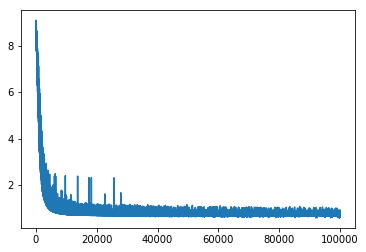

In [23]:
plt.plot(Error_store)
plt.show()